# <center> A Glimpse to pandas</center>

In [1]:
import pandas as pd 
import numpy as np

## Setting

In [2]:
s = pd.Series([1,2,3,4,5,6,7,8], index=pd.date_range("20230718", periods=8))
s

2023-07-18    1
2023-07-19    2
2023-07-20    3
2023-07-21    4
2023-07-22    5
2023-07-23    6
2023-07-24    7
2023-07-25    8
Freq: D, dtype: int64

In [3]:
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,-1.439875,-1.566105,0.559260,-1.028962
2013-01-02,-0.671772,-0.740492,-0.510647,-0.755718
2013-01-03,1.584785,0.761200,-0.795256,-1.465375
2013-01-04,-0.161725,0.453124,-0.361487,-0.178668
2013-01-05,0.470062,0.477318,-0.079919,-0.946500
2013-01-06,1.869151,0.979850,-0.698797,0.459694


In [4]:
len(df)

6

In [5]:
# setting value by label :
df.at[dates[0], "A"] = 0

# setting the value by position :
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5]*len(df))

df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.559260,5.0
2013-01-02,-0.671772,-0.740492,-0.510647,5.0
2013-01-03,1.584785,0.761200,-0.795256,5.0
2013-01-04,-0.161725,0.453124,-0.361487,5.0
2013-01-05,0.470062,0.477318,-0.079919,5.0
2013-01-06,1.869151,0.979850,-0.698797,5.0


## Missing data

```pandas primarily uses the value np.nan to represent missing data.```

* df.dropna(how = "any")
* df.fillna(value = x)
* pd.isna(df)

* df.isna().sum()
* df.isnull().sum()

## Operations

```Stats : ``` Operations in general exclude missing data.

* df.mean()
* df.mean(axis = 1)

In [6]:
s =  pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [7]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.584785,-0.238800,-1.795256,4.0
2013-01-04,-3.161725,-2.546876,-3.361487,2.0
2013-01-05,-4.529938,-4.522682,-5.079919,0.0
2013-01-06,NaN,NaN,NaN,NaN


## Apply()

```DataFrame.apply()``` applies a user defined function to the data:

In [8]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.559260,5.0
2013-01-02,-0.671772,-0.740492,0.048612,10.0
2013-01-03,0.913012,0.020708,-0.746644,15.0
2013-01-04,0.751287,0.473832,-1.108131,20.0
2013-01-05,1.221349,0.951149,-1.188050,25.0
2013-01-06,3.090500,1.930999,-1.886847,30.0


 (by default, the behavior is column-wise). This lambda function calculates the difference between the maximum and minimum values within each column of the DataFrame.

In [9]:
df.apply(lambda x: x.max() - x.min())

A    2.540923
B    1.720342
C    1.354516
D    0.000000
dtype: float64

axis=0 or axis='index' (default):
* The function is applied column-wise, meaning it performs the operation on each column independently. The result will be a Pandas Series, where the index represents the column names, and each value in the Series corresponds to the difference between the maximum and minimum values within each column.

axis=1 or axis='columns':
* The function is applied row-wise, meaning it performs the operation on each row independently.

In [10]:
# Apply the function row-wise (axis=1)
result = df.apply(lambda x: x.max() - x.min(), axis=1)

print(result)

2013-01-01    5.000000
2013-01-02    5.740492
2013-01-03    5.795256
2013-01-04    5.361487
2013-01-05    5.079919
2013-01-06    5.698797
Freq: D, dtype: float64


## Histogramming from Pandas Series

In [11]:
np.random.randint(0, 7, size=10)

array([4, 2, 6, 4, 3, 2, 4, 4, 3, 4])

In [12]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    4
3    4
4    3
5    6
6    5
7    0
8    1
9    5
dtype: int64

In [13]:
s.value_counts()

3    2
4    2
5    2
2    1
6    1
0    1
1    1
Name: count, dtype: int64

<Axes: >

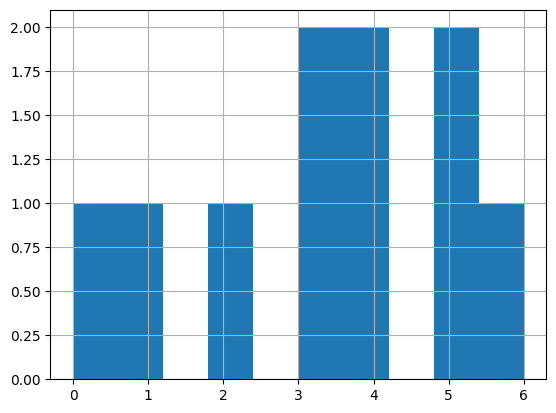

In [14]:
s.hist()

In [15]:
s.unique()

array([2, 3, 4, 6, 5, 0, 1])

## String Manipulation -- Regular Expression

In [16]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge
* Concat
* Join

In [17]:
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.559260,5.0
2013-01-02,-0.671772,-0.740492,-0.510647,5.0
2013-01-03,1.584785,0.761200,-0.795256,5.0
2013-01-04,-0.161725,0.453124,-0.361487,5.0
2013-01-05,0.470062,0.477318,-0.079919,5.0
2013-01-06,1.869151,0.979850,-0.698797,5.0


```merge()``` enables SQL style join types along specific columns.

In [18]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping
By “group by” we are referring to a process involving one or more of the following steps :
* Splitting
* Applying
* Combining

In [23]:
df = pd.DataFrame(
    {
        "A" : ["Shyam", "Mohan", "Shyam","Ram","Mohan"],
        "B" : np.arange(5),
        "C" : np.random.rand(5),
        "D" : np.random.randn(5),
    }
)

In [24]:
df

,A,B,C,D
0,Shyam,0,0.431712,-1.020426
1,Mohan,1,0.758911,-0.042215
2,Shyam,2,0.512447,-2.564736
3,Ram,3,0.159125,0.396867
4,Mohan,4,0.598438,0.958803


In [25]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
Mohan,1.357349,0.916588
Ram,0.159125,0.396867
Shyam,0.944159,-3.585163


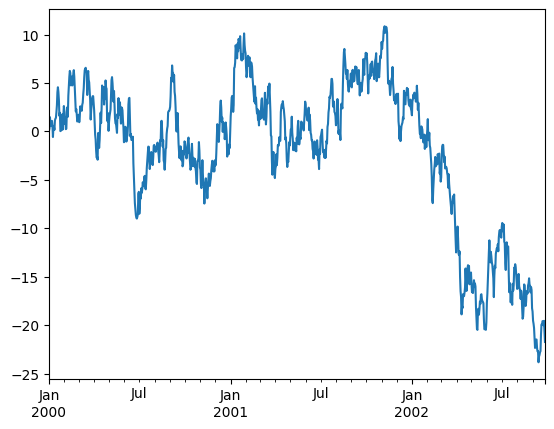

In [26]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();


We can use the Pandas ExcelWriter to save multiple DataFrames into a single Excel file with each DataFrame as a separate sheet.

In [ ]:
import pandas as pd

# Assuming you have four DataFrames: df1, df2, df3, df4

# Create an ExcelWriter object
with pd.ExcelWriter('output_file.xlsx') as writer:
    # Write each DataFrame to a separate sheet
    df1.to_excel(writer, sheet_name='sheet_1', index=False)
    df2.to_excel(writer, sheet_name='sheet_2', index=False)
    df3.to_excel(writer, sheet_name='sheet_3', index=False)
    df4.to_excel(writer, sheet_name='sheet_4', index=False)

# The 'with' block automatically closes the ExcelWriter and saves the file.


df.to_excel("myfile.xlsx", sheet_name="Sheet1")

pd.read_excel("myfile.xlsx", "Sheet1", index_col=None, na_values=["NA"])

NEXT NOTEBOOK